<a href="https://colab.research.google.com/github/agibayrashitnu/Deep-Learning/blob/main/Stock%20Price%20Prediction%20with%20LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install tensorflow-gpu

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving test_set.csv to test_set.csv
Saving train_set.csv to train_set.csv


In [ ]:
training_data = pd.read_csv('/content/train_set.csv')
training_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-09-21,28.417500,28.842501,28.415001,28.8025,26.144228,200888000
1,2015-09-22,28.344999,28.545000,28.129999,28.3500,25.733496,201384800
2,2015-09-23,28.407499,28.680000,28.325001,28.5800,25.942265,143026800
3,2015-09-24,28.312500,28.875000,28.092501,28.7500,26.096577,200878000
4,2015-09-25,29.110001,29.172501,28.504999,28.6775,26.030764,224607600


In [ ]:
training_data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1987,2023-08-14,177.970001,179.690002,177.309998,179.460007,179.460007,43675600
1988,2023-08-15,178.880005,179.479996,177.050003,177.449997,177.449997,43622600
1989,2023-08-16,177.130005,178.539993,176.500000,176.570007,176.570007,46964900
1990,2023-08-17,177.139999,177.509995,173.479996,174.000000,174.000000,66062900
1991,2023-08-18,172.300003,175.100006,171.960007,174.490005,174.490005,61114200


In [ ]:
training_data.info()

In [ ]:
training_set = training_data.iloc[:,1:2].values
training_set

In [ ]:
training_set.shape, training_data.shape

In [ ]:
#feature scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)
training_set_scaled

In [ ]:
#Creating a data structure with 60 timesteps and 1 output
x_train = []
y_train = []
for i in range(60,1992):
  x_train.append(training_set_scaled[i-60:i,0])
  y_train.append(training_set_scaled[i,0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
 x_train, y_train

In [ ]:
 x_train.shape, y_train.shape

((1932, 60), (1932,))

In [ ]:
#reshaping the dataset
x_train = x_train.reshape(1932,60,1)

# Building LSTM

In [ ]:
model = tf.keras.models.Sequential()

In [ ]:
model.add(tf.keras.layers.LSTM(units = 60, activation = 'relu',
                               return_sequences=True, input_shape=(60,1)))
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.LSTM(units = 60, activation = 'relu',
                               return_sequences=True))
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.LSTM(units = 80, activation = 'relu',
                               return_sequences=True))
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.LSTM(units = 120, activation = 'relu',))
model.add(tf.keras.layers.Dropout(0.2))


In [ ]:
model.add(tf.keras.layers.Dense(units = 1))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 60)            14880     
                                                                 
 dropout (Dropout)           (None, 60, 60)            0         
                                                                 
 lstm_1 (LSTM)               (None, 60, 60)            29040     
                                                                 
 dropout_1 (Dropout)         (None, 60, 60)            0         
                                                                 
 lstm_2 (LSTM)               (None, 60, 80)            45120     
                                                                 
 dropout_2 (Dropout)         (None, 60, 80)            0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')

# Training the model

In [ ]:
model.fit(x_train, y_train, batch_size=32, epochs = 100)

Epoch 1/100
61/61 [==============================] - 18s 196ms/step - loss: 0.0340
Epoch 2/100
61/61 [==============================] - 12s 196ms/step - loss: 0.0037
Epoch 3/100
61/61 [==============================] - 12s 197ms/step - loss: 0.0032
Epoch 4/100
61/61 [==============================] - 12s 196ms/step - loss: 0.0032
Epoch 5/100
61/61 [==============================] - 12s 195ms/step - loss: 0.0032
Epoch 6/100
61/61 [==============================] - 13s 209ms/step - loss: 0.0032
Epoch 7/100
61/61 [==============================] - 14s 225ms/step - loss: 0.0030
Epoch 8/100
61/61 [==============================] - 12s 204ms/step - loss: 0.0029
Epoch 9/100
61/61 [==============================] - 12s 198ms/step - loss: 0.0030
Epoch 10/100
61/61 [==============================] - 11s 179ms/step - loss: 0.0031
Epoch 11/100
61/61 [==============================] - 13s 218ms/step - loss: 0.0026
Epoch 12/100
61/61 [==============================] - 12s 187ms/step - loss: 0.0027
E

# Making Predictions


In [ ]:
test_data = pd.read_csv('/content/test_set.csv')
test_data.shape

(20, 7)

In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       20 non-null     object 
 1   Open       20 non-null     float64
 2   High       20 non-null     float64
 3   Low        20 non-null     float64
 4   Close      20 non-null     float64
 5   Adj Close  20 non-null     float64
 6   Volume     20 non-null     int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 1.2+ KB


In [ ]:
real_stock_price = test_data.iloc[:, 1:2].values


In [ ]:
real_stock_price.shape

(20, 1)

In [ ]:
dataset_total = pd.concat((training_data['Open'],test_data['Open']), axis = 0)


In [ ]:
inputs = dataset_total[len(dataset_total)- len(real_stock_price)-60:].values

In [ ]:
inputs = inputs.reshape(-1,1)

In [ ]:
inputs

In [ ]:
inputs = sc.transform(inputs)

In [ ]:
inputs

In [ ]:
x_test =[]
for i in range(60,80):
  x_test.append(inputs[i-60:i,0])

x_test = np.array(x_test)


In [ ]:
#convert in 3d since RNN in 3d
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [ ]:
predicted_stock_price = model.predict(x_test)


1/1 [==============================] - 1s 633ms/step


In [ ]:
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [ ]:
print(predicted_stock_price)


In [ ]:
print(real_stock_price)

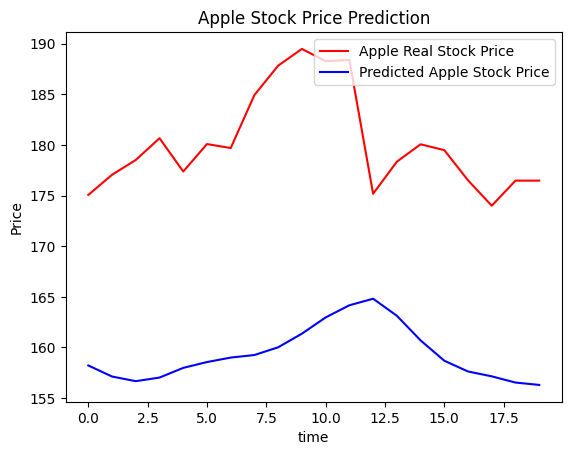

In [ ]:
plt.plot(real_stock_price, color = 'r', label = 'Apple Real Stock Price')
plt.plot(predicted_stock_price, color='b', label ='Predicted Apple Stock Price')
plt.xlabel('time')
plt.ylabel('Price')
plt.title("Apple Stock Price Prediction")
plt.legend(loc = 'upper right')
plt.show()
